In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, MaxPooling2D
from keras import backend as K
import pickle
import numpy as np
import tensorflow as tf
from keras.layers import Conv2D, MaxPool2D
from keras.layers.advanced_activations import LeakyReLUfrom keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


# Unpickling 

In [2]:
pickle_trainx = open("trainX.pickle","rb")
pickle_trainy = open("trainY.pickle","rb")
X = pickle.load(pickle_trainx)
y = pickle.load(pickle_trainy)

In [3]:
print(X.shape)
print(y.shape)

(60000, 28, 28)
(60000,)


## Splitting into training and testing

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
img_rows, img_cols = 28, 28

In [6]:
print("X_train ", X_train.shape)
print("X_test ",X_test.shape)
print("y_train ", y_train.shape)
print("y_test ",y_test.shape)

X_train  (48000, 28, 28)
X_test  (12000, 28, 28)
y_train  (48000,)
y_test  (12000,)


##  Total labels

In [7]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# **Visualizing**

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

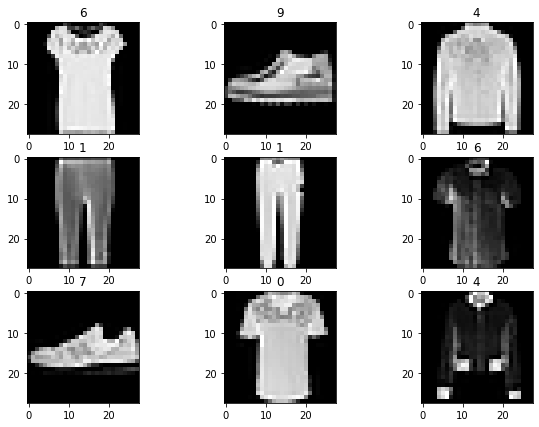

In [9]:
plt.figure(figsize=(10,7))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])
plt.show()

# Normalizing

In [10]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

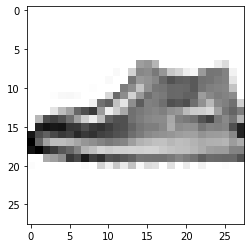

In [11]:
plt.imshow(X_train[1], cmap = plt.cm.binary)
plt.show()

## Preprocessing and One Hot Encoding 

In [12]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0],img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [13]:
print(X_train.shape)
print(X_test.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)


In [14]:
print(input_shape)

(28, 28, 1)


In [15]:
batch_size = 128
num_classes = 10
epochs = 30

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# X_train /= 255
# X_test /= 255
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test sample')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train shape: (48000, 28, 28, 1)
X_test shape: (12000, 28, 28, 1)
48000 train samples
12000 test sample


# Model 

In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.25))

model.add(Dense(10))
model.add(Activation("softmax"))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 16)          4624      
__________

In [18]:
# model = Sequential()
# model.add(Conv2D(16, (3,3), input_shape=(28,28,1)))
# model.add(Activation('relu'))
# model.add(MaxPool2D((2,2)))

# model.add(Conv2D(32, (5,5), activation='relu'))
# model.add(MaxPool2D((2,2)))

# model.add(Flatten())
# model.add(Dense(1024, activation='sigmoid'))
# model.add(Dense(256, activation='tanh'))
# model.add(Dense(10))
# model.add(Activation('softmax'))

# model.summary()
# model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 32)          12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
__________

In [21]:
chck = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, save_best_only=True,save_weights_only=False,
                     mode='auto', period=1)
mymodel = model.fit(X_train, y_train,
         batch_size = batch_size,
         epochs = epochs,
         verbose = 1,
         validation_data = (X_test, y_test),
         callbacks=[chck])

score = model.evaluate(X_test, y_test, verbose=0)
print('Test_loss :', score[0])
print('Test_accuracy :', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 38s 791us/step - loss: 0.7952 - acc: 0.7054 - val_loss: 0.5126 - val_acc: 0.8108
Epoch 2/30
48000/48000 [==============================] - 37s 772us/step - loss: 0.5026 - acc: 0.8147 - val_loss: 0.4202 - val_acc: 0.8458
Epoch 3/30
48000/48000 [==============================] - 38s 791us/step - loss: 0.4349 - acc: 0.8391 - val_loss: 0.3840 - val_acc: 0.8549
Epoch 4/30
48000/48000 [==============================] - 37s 776us/step - loss: 0.3958 - acc: 0.8544 - val_loss: 0.3596 - val_acc: 0.8642
Epoch 5/30
48000/48000 [==============================] - 38s 791us/step - loss: 0.3699 - acc: 0.8625 - val_loss: 0.3627 - val_acc: 0.8622
Epoch 6/30
48000/48000 [==============================] - 39s 806us/step - loss: 0.3527 - acc: 0.8704 - val_loss: 0.3423 - val_acc: 0.8705
Epoch 7/30
48000/48000 [==============================] - 37s 762us/step - loss: 0.3357 - acc: 0.8755 - val_loss: 0.

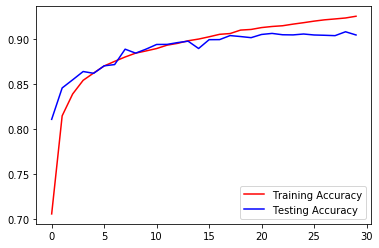

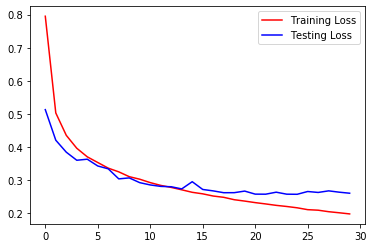

In [22]:
plt.figure()
plt.plot(mymodel.history['acc'], 'r', label='Training Accuracy')
plt.plot(mymodel.history['val_acc'], 'b', label='Testing Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(mymodel.history['loss'], 'r', label='Training Loss')
plt.plot(mymodel.history['val_loss'], 'b', label='Testing Loss')
plt.legend()
plt.show()

# Predictions for the testX file

In [23]:
pickle_testX = open("testX.pickle","rb")
testX = pickle.load(pickle_testX)

In [24]:
print(testX.shape)

(10000, 28, 28)


In [25]:
testX = testX.astype('float32')
testX /= 255
testX = testX.reshape(10000,28,28,1)

In [26]:
y_pred = model.predict_classes(testX)

# Saving in output.pickle file 

In [27]:
with open('output.pickle','wb') as f:
    pickle.dump(y_pred,f)